![example](images/director_shot.jpeg)

# A Movie Success Story - An In-Depth Analysis on Successful Movies by Budgets & Genres

**Author:** Melvin Garcia
***

## Overview

The aim of this report is derive insights on what makes a movie successful (and is not) from data ranging between IMDB, Rotten Tomatoes, Box Office Mojo, TheMovieDB.org and the-numbers.com. These data insights / analyses on the movie industry are intended to help Microsoft stakeholders make informed decisions on different approaches to make an entryway into the movie industry. The method to observe successful movies throughout our movie database was through analyzing the profits of movies at different budget levels and genres. Profits are defined as X times the original production budget -- "how many X times in domestic and worldwide gross did a movie make over their production budget. It was observed that while the genres Action, Adventure, Comedy, Drama, and Animation generate the most revenue in worldwide gross, the most profitable movie genres are Horror, Mystery, Music, Musical and Animation. To dial down further examining the average rating for the most profitable genres -- Biography and Animation are ranked 1 & 2 respectively for the higher rated movies with the Music genre having the widest spread. As a result, it would be recommended as a start to consider a movie in these genre classes and as a follow-up investigate an appropriate movie director to reach out to for Microsoft's first movie.

## Business Problem

The current and largest pain point of Microsofts entryway into the movie industry is understanding the industry overall. If Microsoft wants to make a good first impression, one would need to understand the characteristics and blueprint of a successful movie. Although the opinion and path to producing a successful movie is subjective, to simplify our use case, we will use profits as the key performance indicator for a movie -- that is, how many more times in revenue did a movie produce worldwide and domestically over its original production budget. The amount in revenue a movie makes appears as a natural indicator for a successful movie as it can set the precedence, and budget for future movie production.

## Data Understanding

The data pulled, queried, and scraped for this analysis range between IMDB, Rotten Tomatoes, Box Office Mojo, TheMovieDB.org and the-numbers.com. The data from these sources are relevant because they contain data points such as production budget, domestic and worldwide gross, IMDB ratings, Rotten Tomatoes ratings, directors, and genres. Specifically for the scope of this analysis, I intend to initially use the variables -- production budget, domestic and worldwide gross, and IMDB ratings. With these characteristics, I aim to observe how they trend against procured categories such as low, medium and high production budgets, and lastly how do they breakdown genre-to-genre. From these data points, I aim to understand a starting point in production budget and genre that will provide highest chance of a first successful movie from Microsoft Studios.

In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Data visualization packages
import seaborn as sns
import plotly.express as px
from pylab import rcParams

%matplotlib inline

In [3]:
# Connect to DB
import sqlite3
conn = sqlite3.connect('data\movies.db')
cur  = conn.cursor()

## DB Schema to Reference

![movies.db schema](images/movies_db_schema.png)

## Explore the data
Run a few simple queries to get a sense of what kind of data is contained within the tables from the above schema

In [4]:
# Peek the head of rotten_tomatoes_movies table
sql_query = cur.execute("""SELECT * FROM rotten_tomatoes_movies;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [5]:
# Peek the head of tmdb_movies table
sql_query = cur.execute("""SELECT * FROM tmdb_movies;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [6]:
# Peek the head of imdb_title_principals table
sql_query = cur.execute("""SELECT * FROM imdb_title_principals LIMIT 5;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,tconst,ordering,nconst,category,job,characters
0,0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,1,tt0111414,2,nm0398271,director,None,None
2,2,tt0111414,3,nm3739909,producer,producer,None
3,3,tt0323808,10,nm0059247,editor,None,None
4,4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [7]:
# Peek the head of bom_movie_gross table
sql_query = cur.execute("""SELECT * FROM bom_movie_gross LIMIT 5;""").fetchall()
df = pd.DataFrame(sql_query)
df.columns = [x[0] for x in cur.description]
df.head()

,idx,title,studio,domestic_gross,foreign_gross,year
0,0,Toy Story 3,BV,415000000.0,652000000,2010
1,1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,3,Inception,WB,292600000.0,535700000,2010
4,4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Define function to more conveniently, read in SQL query and return pandas dataframe

In [10]:
def pandas_df_sql(query):
    """
    Purpose of this function is take in string type sql query. If the table is properly loaded in the environment,
    the function will return the SQL query result in a pandas dataframe.
    
    Params
    :query - String SQL query
    """
    df = pd.read_sql(query,conn)
    
    return df

Get movies by imdb title, bom_movie_gross, tmdb_movies and tn_movie_budgets

Experiment and test pandas_df_sql function with the query below

In [11]:
# The query below is a first pass in using the pandas_df_sql function
movie_budgetgross_query = """
SELECT * FROM imdb_title_basics itb
JOIN bom_movie_gross bmg ON itb.primary_title = bmg.title
JOIN tn_movie_budgets tmb ON tmb.movie = itb.primary_title;
"""

movie_gross_df = pandas_df_sql(movie_budgetgross_query)
movie_gross_df.info()
movie_gross_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idx                1602 non-null   int64  
 1   tconst             1602 non-null   object 
 2   primary_title      1602 non-null   object 
 3   original_title     1602 non-null   object 
 4   start_year         1602 non-null   int64  
 5   runtime_minutes    1502 non-null   float64
 6   genres             1576 non-null   object 
 7   idx                1602 non-null   int64  
 8   title              1602 non-null   object 
 9   studio             1602 non-null   object 
 10  domestic_gross     1601 non-null   float64
 11  foreign_gross      1372 non-null   object 
 12  year               1602 non-null   int64  
 13  idx                1602 non-null   int64  
 14  id                 1602 non-null   int64  
 15  release_date       1602 non-null   object 
 16  movie              1602 

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,48,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",904,On the Road,IFC,744000.0,8000000,2012,2316,17,"Mar 22, 2013",On the Road,"$25,000,000","$720,828","$9,313,302"
1,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1169,The Secret Life of Walter Mitty,Fox,58200000.0,129900000,2013,436,37,"Dec 25, 2013",The Secret Life of Walter Mitty,"$91,000,000","$58,236,838","$187,861,183"
2,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1577,A Walk Among the Tombstones,Uni.,26300000.0,26900000,2014,2066,67,"Sep 19, 2014",A Walk Among the Tombstones,"$28,000,000","$26,017,685","$62,108,587"
3,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015,33,34,"Jun 12, 2015",Jurassic World,"$215,000,000","$652,270,625","$1,648,854,864"
4,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",474,The Rum Diary,FD,13100000.0,10800000,2011,1315,16,"Oct 28, 2011",The Rum Diary,"$45,000,000","$13,109,815","$21,544,732"


Check for duplicates on primary_title column

In [12]:
movie_gross_df[movie_gross_df.duplicated(['primary_title'])].sort_values('primary_title')

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,domestic_gross,foreign_gross,year,idx,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
622,15256,tt1734060,50/50,50/50,2010,77.0,Documentary,448,50/50,Sum.,35000000.0,4200000,2011,3872,73,"Sep 30, 2011",50/50,"$8,000,000","$35,016,118","$41,334,735"
778,25786,tt2027265,A Better Life,Une vie meilleure,2011,110.0,Drama,581,A Better Life,Sum.,1800000.0,None,2011,3683,84,"Jun 24, 2011",A Better Life,"$10,000,000","$1,759,252","$1,884,251"
1488,113035,tt6644200,A Quiet Place,A Quiet Place,2018,90.0,"Drama,Horror,Sci-Fi",3108,A Quiet Place,Par.,188000000.0,152900000,2018,2865,66,"Apr 6, 2018",A Quiet Place,"$17,000,000","$188,024,361","$334,522,294"
1549,128101,tt7867360,Abduction,Abduction,2019,106.0,"Action,Sci-Fi",409,Abduction,LGF,28100000.0,54000000,2011,1695,96,"Sep 23, 2011",Abduction,"$35,000,000","$28,087,155","$86,648,359"
913,36659,tt2335176,Abduction,Abduction,2013,NaN,Drama,409,Abduction,LGF,28100000.0,54000000,2011,1695,96,"Sep 23, 2011",Abduction,"$35,000,000","$28,087,155","$86,648,359"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1261,75016,tt4283448,Wonder Woman,Wonder Woman,2016,75.0,"Documentary,Drama,Sport",2767,Wonder Woman,WB,412600000.0,409300000,2017,154,55,"Jun 2, 2017",Wonder Woman,"$150,000,000","$412,563,408","$821,133,378"
1489,113152,tt6654316,Youth,Fang hua,2017,135.0,"Drama,Romance,War",2077,Youth,FoxS,2700000.0,None,2015,3298,99,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573"
1113,56684,tt3312830,Youth,Youth,2015,124.0,"Comedy,Drama,Music",2077,Youth,FoxS,2700000.0,None,2015,3298,99,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573"
1415,97229,tt5671384,Youth,Youth,2016,124.0,Drama,2077,Youth,FoxS,2700000.0,None,2015,3298,99,"Dec 4, 2015",Youth,"$13,000,000","$2,703,296","$24,001,573"


**Notes:**

Notably the joins are not perfect between the three tables. 

Movies of the same name may be joined when releasing on totally different years and different movie gross results. 

Possibly set up a unique key like title + year to join on. However, this assumes that movies of that same name would not be produced in the same year.

## Data Preparation

The main tables used in this analysis were imdb_title_basics, tn_movie_budgets, bom_movie_gross, tmdb_movies, and imdb_title_ratings. Since there are no unique keys that already exist between these tables, I created a key combination of movie title + year to join these tables through. However, this method assumes that no two movies of the same name are produced in the same year. Moreover, after joining the tables on this generated key -- the essential data points to consider include:

- production_budget
- domestic_gross
- worldwide_gross
- averagerating (imdb)
- popularity

The categorical variables to consider are:

- production budget binned between low, medium and high
- genre_label

Between production_budget, domestic_gross, and worldwide gross, these data points were combined to generate a profit ratio -- that is:

- domestic_gross_budget_ratio = domestic_gross / production budget
- worldwide_gross_budget_ratio = worldwide_gross / production_budget

The two generated metrics above are used as the starting point in determining successful movies. Some questions to consider include:

1. Which production budget class is a good starting point to position Microsoft for high profits?
2. How much profits are they looking to gain?

Based on these answers, I aim to examine which genres of movies are best to first delve into and explore.

Get movies by imdb title, bom_movie_gross, tmdb_movies and tn_movie_budgets

In [14]:
# Join tables imdb_title_basics, bom_movie_gross, tn_movie_budgets and tmdb_movies by movie title and the year it was released
movie_budgetgross_query = """
SELECT 
    *
FROM imdb_title_basics itb
JOIN bom_movie_gross bmg
ON itb.primary_title = bmg.title AND itb.start_year = bmg.year
JOIN
    (
    SELECT 
        movie,
        SUBSTR(release_date, LENGTH(release_date) - 3, 4)as year,
        production_budget,
        domestic_gross tnb_domestic_gross,
        worldwide_gross
    FROM tn_movie_budgets
    ) tnb
ON tnb.movie = itb.primary_title AND tnb.year = itb.start_year
JOIN
    (
    SELECT 
        title,
        SUBSTR(release_date, 1, 4)as year,
        popularity
    FROM tmdb_movies
    ) tmdb
ON tnb.movie = tmdb.title AND tnb.year = tmdb.year
"""

In [19]:
# Run query and save to a pandas dataframe
movie_gross_df = pandas_df_sql(movie_budgetgross_query)

In [20]:
# Use .info() to examine the data types (should any columns be converted) and null values (should any be handled)
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   idx                 1138 non-null   int64  
 1   tconst              1138 non-null   object 
 2   primary_title       1138 non-null   object 
 3   original_title      1138 non-null   object 
 4   start_year          1138 non-null   int64  
 5   runtime_minutes     1133 non-null   float64
 6   genres              1137 non-null   object 
 7   idx                 1138 non-null   int64  
 8   title               1138 non-null   object 
 9   studio              1138 non-null   object 
 10  domestic_gross      1137 non-null   float64
 11  foreign_gross       1030 non-null   object 
 12  year                1138 non-null   int64  
 13  movie               1138 non-null   object 
 14  year                1138 non-null   object 
 15  production_budget   1138 non-null   object 
 16  tnb_do

In [21]:
# Peek data
movie_gross_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1169,The Secret Life of Walter Mitty,Fox,...,129900000,2013,The Secret Life of Walter Mitty,2013,"$91,000,000","$58,236,838","$187,861,183",The Secret Life of Walter Mitty,2013,10.743
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1577,A Walk Among the Tombstones,Uni.,...,26900000,2014,A Walk Among the Tombstones,2014,"$28,000,000","$26,017,685","$62,108,587",A Walk Among the Tombstones,2014,19.373
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1873,Jurassic World,Uni.,...,"1,019.4",2015,Jurassic World,2015,"$215,000,000","$652,270,625","$1,648,854,864",Jurassic World,2015,20.709
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",474,The Rum Diary,FD,...,10800000,2011,The Rum Diary,2011,"$45,000,000","$13,109,815","$21,544,732",The Rum Diary,2011,12.011
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",823,The Three Stooges,Fox,...,10500000,2012,The Three Stooges,2012,"$30,000,000","$44,338,224","$54,052,249",The Three Stooges,2012,9.358


Convert production_budget, domestic_gross and worldwide_gross to int type.
Remove '$' and commas

In [22]:
# Isolate the money columns to be cleaned and converted into integer type
string_to_int_cols = ['production_budget','tnb_domestic_gross','worldwide_gross']

# Iterate through the isolated columns
for col in string_to_int_cols:
    # Remove $ signs and commes
    movie_gross_df[col] = movie_gross_df[col].apply(lambda x: x.replace('$','').replace(',',''))
    # Once the $ signs and commas are removed, convert to integer type
    movie_gross_df[col] = movie_gross_df[col].astype(int)

# Peek head of dataframe
movie_gross_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,foreign_gross,year,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity
0,54,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",1169,The Secret Life of Walter Mitty,Fox,...,129900000,2013,The Secret Life of Walter Mitty,2013,91000000,58236838,187861183,The Secret Life of Walter Mitty,2013,10.743
1,58,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",1577,A Walk Among the Tombstones,Uni.,...,26900000,2014,A Walk Among the Tombstones,2014,28000000,26017685,62108587,A Walk Among the Tombstones,2014,19.373
2,60,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",1873,Jurassic World,Uni.,...,"1,019.4",2015,Jurassic World,2015,215000000,652270625,1648854864,Jurassic World,2015,20.709
3,62,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",474,The Rum Diary,FD,...,10800000,2011,The Rum Diary,2011,45000000,13109815,21544732,The Rum Diary,2011,12.011
4,67,tt0383010,The Three Stooges,The Three Stooges,2012,92.0,"Comedy,Family",823,The Three Stooges,Fox,...,10500000,2012,The Three Stooges,2012,30000000,44338224,54052249,The Three Stooges,2012,9.358


Create column to get most budget-gross ratio or profit

### Set up metrics for measuring profits
Let's use **domestic_gross_budget_ratio** and **worldwide_gross_budget_ratio** as initial metrics for indicators of movie success. This ratio is to signify 'X' times the movie gross over their production budget.

In [23]:
# Create column to measure profits domestically
movie_gross_df['domestic_gross_budget_ratio'] = movie_gross_df['tnb_domestic_gross'] / movie_gross_df['production_budget']

# Create column to measure profits worldwide
movie_gross_df['worldwide_gross_budget_ratio'] = movie_gross_df['worldwide_gross'] / movie_gross_df['production_budget']

# Sort values by worldwide gross-budget ratio for peeking at data
movie_gross_df.sort_values('worldwide_gross_budget_ratio',ascending=False,inplace=True)

In [24]:
# Peek at newly created columns
movie_gross_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio
730,35625,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",1986,The Gallows,WB (NL),...,The Gallows,2015,100000,22764410,41656474,The Gallows,2015,9.166,227.644100,416.564740
397,9487,tt1560985,The Devil Inside,The Devil Inside,2012,83.0,Horror,795,The Devil Inside,Par.,...,The Devil Inside,2012,1000000,53262945,101759490,The Devil Inside,2012,7.403,53.262945,101.759490
383,8964,tt1536044,Paranormal Activity 2,Paranormal Activity 2,2010,91.0,Horror,39,Paranormal Activity 2,Par.,...,Paranormal Activity 2,2010,3000000,84752907,177512032,Paranormal Activity 2,2010,8.163,28.250969,59.170677
1055,87039,tt5052448,Get Out,Get Out,2017,104.0,"Horror,Mystery,Thriller",2794,Get Out,Uni.,...,Get Out,2017,5000000,176040665,255367951,Get Out,2017,24.739,35.208133,51.073590
635,24683,tt1991245,Chernobyl Diaries,Chernobyl Diaries,2012,86.0,"Horror,Mystery,Thriller",839,Chernobyl Diaries,WB,...,Chernobyl Diaries,2012,1000000,18119640,42411721,Chernobyl Diaries,2012,14.658,18.119640,42.411721


Points to investigate
- Consider dropping outliers
- Bucket the budgets 
- Create these bins --> scatter plots of ratings vs ratios (where can we see the linear relationship)

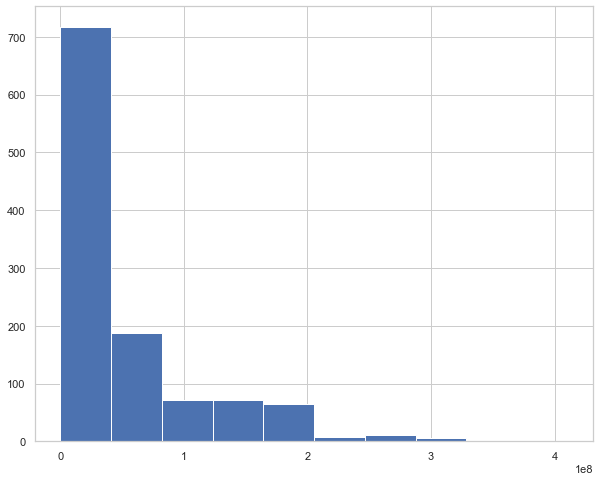

In [153]:
# Observe the distribution of production budget of movies
movie_gross_df.production_budget.hist();

There appears to be a right-skew in the distribution of production budgets, potentially introducting outliers. Majority of the movies appear to have a production budget of less than $1,000,00. 

In [154]:
# Observe high-level statistics of production budget columns
movie_gross_df.production_budget.describe()

count    1.138000e+03
mean     5.287208e+07
std      5.926113e+07
min      5.000000e+04
25%      1.300000e+07
50%      3.000000e+07
75%      6.800000e+07
max      4.106000e+08
Name: production_budget, dtype: float64

In [155]:
# Observe median of mean of production budget
print( f'Median budget for production: {movie_gross_df.production_budget.median()}' )
print( f'Mean budget for production: {movie_gross_df.production_budget.mean()}' )

Median budget for production: 30000000.0
Mean budget for production: 52872084.92970123


Next steps:

Collect all genres to gain sense of the range and variety

- Convert genres from strings to list
- Get list of all genres and flatten list

### Observe and Remove the Outliers
- Observe outliers in the numeric columns
- Remove them using z-score for threshold larger than 2
- Z-score is a statistical measure telling one how far a data point is from the rest of the dataset

In [26]:
# Obtain z score for numeric columns in movie_gross_df
z = np.abs(stats.zscore(movie_gross_df[['production_budget',
                                        'tnb_domestic_gross', 
                                        'worldwide_gross', 
                                        'domestic_gross_budget_ratio',
                                        'worldwide_gross_budget_ratio']]))
print(z)

[[8.90892372e-01 5.29381381e-01 5.40736062e-01 3.02755655e+01
  3.02270337e+01]
 [8.75698674e-01 1.92672130e-01 3.01095763e-01 6.85354845e+00
  7.13272006e+00]
 [8.41934900e-01 1.54982650e-01 9.41689761e-04 3.49406314e+00
  4.00837764e+00]
 ...
 [6.89997918e-01 7.80511544e-01 7.06477015e-01 3.00272103e-01
  3.31884219e-01]
 [5.88706596e-01 7.80704516e-01 7.06448467e-01 3.00467745e-01
  3.32033942e-01]
 [8.16612070e-01 7.80574528e-01 7.06780115e-01 3.00116317e-01
  3.32228987e-01]]


In [27]:
# Set the threshold to 2 and observe where with np.where the threshold for z score larger than 2 occurs
threshold = 2
print(np.where(z > threshold))

(array([  0,   0,   1,   1,   2,   2,   3,   3,   4,   4,   5,   5,   6,
         7,   7,   9,  19,  27,  27,  28,  28,  32,  34,  39,  41,  41,
        50,  50,  51,  51,  57,  57,  66,  66,  76,  76,  77,  77,  81,
        81,  92,  93,  97, 118, 118, 120, 121, 122, 130, 130, 130, 138,
       138, 140, 140, 140, 145, 150, 150, 151, 151, 159, 159, 159, 162,
       162, 164, 164, 164, 166, 166, 175, 175, 178, 178, 178, 182, 182,
       183, 183, 183, 195, 195, 195, 204, 204, 204, 206, 206, 214, 214,
       214, 221, 221, 222, 222, 222, 223, 223, 223, 224, 224, 232, 237,
       237, 237, 245, 245, 245, 250, 250, 255, 255, 255, 264, 264, 264,
       265, 265, 265, 276, 281, 281, 281, 282, 282, 283, 283, 284, 284,
       285, 285, 286, 286, 308, 308, 308, 312, 312, 312, 319, 319, 322,
       322, 326, 342, 342, 342, 346, 347, 365, 365, 365, 377, 377, 377,
       387, 387, 387, 391, 391, 392, 392, 392, 397, 409, 409, 423, 423,
       423, 427, 427, 427, 430, 430, 452, 486, 488, 493, 498, 5

In [28]:
# Filter movie_gross_df where z score threshold is less than 2 and rename the dataframe to movie_gross_df_o to indicate df without outliers
movie_gross_df_o = movie_gross_df[(z < 2).all(axis=1)]

In [30]:
# Observe how much the dataframe has trimmed down after removing outliers
print(movie_gross_df.shape)
print(movie_gross_df_o.shape)

(1138, 23)
(1017, 23)


In [31]:
# Peek data
movie_gross_df_o.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,movie,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio
1057,87402,tt5074352,Dangal,Dangal,2016,161.0,"Action,Biography,Drama",2351,Dangal,UTV,...,Dangal,2016,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276
1068,92110,tt5328340,Lights Out,Lights Out,2016,90.0,Documentary,2380,Lights Out,WB (NL),...,Lights Out,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302
1034,82941,tt4786282,Lights Out,Lights Out,2016,81.0,"Drama,Horror,Mystery",2380,Lights Out,WB (NL),...,Lights Out,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302
604,22460,tt1922777,Sinister,Sinister,2012,110.0,"Horror,Mystery,Thriller",808,Sinister,LG/S,...,Sinister,2012,3000000,48086903,87727807,Sinister,2012,13.117,16.028968,29.242602
667,28752,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88.0,"Horror,Mystery,Thriller",777,Paranormal Activity 4,Par.,...,Paranormal Activity 4,2012,5000000,53900335,142817992,Paranormal Activity 4,2012,8.965,10.780067,28.563598


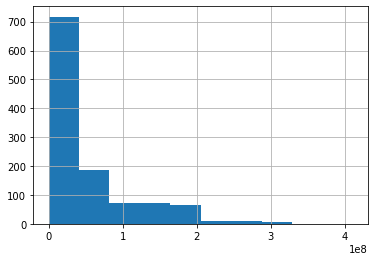

In [32]:
# Observe the OLD distribution of production budget with outliers removed
movie_gross_df.production_budget.hist();

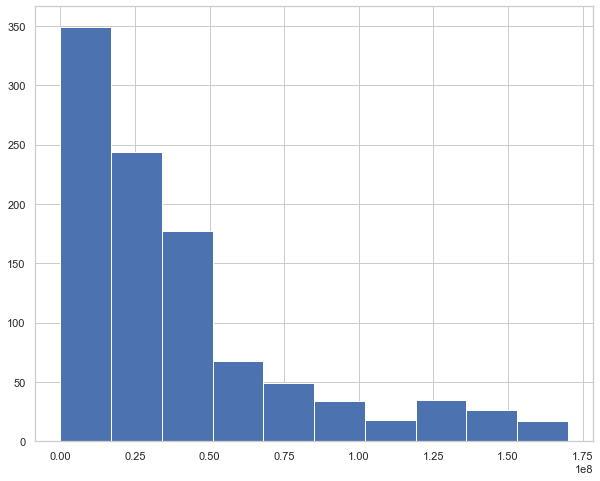

In [162]:
# Observe the NEW distribution of production budget with outliers removed
movie_gross_df_o.production_budget.hist();

Based the old and new distributions -- while overall it is right skewed, the severity is less with the removal the production budgets > $ 2 million

### Genre Exploration

In [33]:
# Get list of unique genres from dataframe
genres_list = [ x.split(',') for x in movie_gross_df_o['genres'].fillna('') ]
genres_list = [item for sublist in genres_list for item in sublist]
genres_list = list( set(genres_list) )
genres_list

['',
 'Biography',
 'Animation',
 'Adventure',
 'Documentary',
 'Sci-Fi',
 'Sport',
 'Action',
 'History',
 'Family',
 'Drama',
 'Musical',
 'Thriller',
 'Fantasy',
 'Mystery',
 'Crime',
 'Romance',
 'Music',
 'Western',
 'Horror',
 'War',
 'Comedy']

Create a genres dataframe splitting the movies to individual genres.However, because movies may be listed under multiple genres, there is an expecteation of duplicates

In [35]:
# Fillna with a blank string where there is missing values in columns of string type
movie_gross_df_o.fillna('',inplace=True)

C:\Users\garci\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [36]:
# Confirm there is no more null values
movie_gross_df_o.isna().any()

idx                             False
tconst                          False
primary_title                   False
original_title                  False
start_year                      False
runtime_minutes                 False
genres                          False
idx                             False
title                           False
studio                          False
domestic_gross                  False
foreign_gross                   False
year                            False
movie                           False
year                            False
production_budget               False
tnb_domestic_gross              False
worldwide_gross                 False
title                           False
year                            False
popularity                      False
domestic_gross_budget_ratio     False
worldwide_gross_budget_ratio    False
dtype: bool

In [37]:
# Create a blank genres_df
genres_df = pd.DataFrame()

# Iterate through the created genres_list above skipping over blank genres
for genre in genres_list[1:]:
    # Filter movie_gross_df_o for movies with the genre we are checking
    label_genre_df = movie_gross_df_o[ movie_gross_df_o['genres'].str.contains(genre) ]
    # For the current genre we are checking, create a new column and label the genre
    label_genre_df['genre_label'] = genre
    
    # Append the label_genre_df to the genres_df where a newly constructed df will be created separting movies into genres
    genres_df = genres_df.append(label_genre_df)

<ipython-input-37-e56cdccc5e21>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_genre_df['genre_label'] = genre


In [38]:
# Peek the new shape and tail of the data
print(genres_df.shape)
genres_df.tail()

(2619, 24)


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label
551,18009,tt1798243,Rudderless,Rudderless,2014,105,"Comedy,Drama,Music",1824,Rudderless,Gold.,...,2014,5000000,56001,567219,Rudderless,2014,8.030,0.011200,0.113444,Comedy
527,15094,tt1730687,Darling Companion,Darling Companion,2012,103,"Comedy,Drama,Romance",1000,Darling Companion,SPC,...,2012,12000000,793352,1200346,Darling Companion,2012,4.656,0.066113,0.100029,Comedy
266,6975,tt1361313,The Extra Man,The Extra Man,2010,108,Comedy,266,The Extra Man,Magn.,...,2010,7000000,453377,492108,The Extra Man,2010,5.056,0.064768,0.070301,Comedy
218,6292,tt1274300,The Tempest,The Tempest,2010,110,"Comedy,Drama,Fantasy",270,The Tempest,Mira.,...,2010,20000000,277943,277943,The Tempest,2010,6.300,0.013897,0.013897,Comedy
536,16525,tt1763303,The First Time,The First Time,2012,95,"Comedy,Drama,Romance",1097,The First Time,Gold.,...,2012,2000000,17061,17061,The First Time,2012,11.250,0.008530,0.008530,Comedy


### Domestic Gross Profits by Genre
Now that we have genres_df set up separating movies into individual genres, let us observe the spread and breakdown of the movies we have by genre

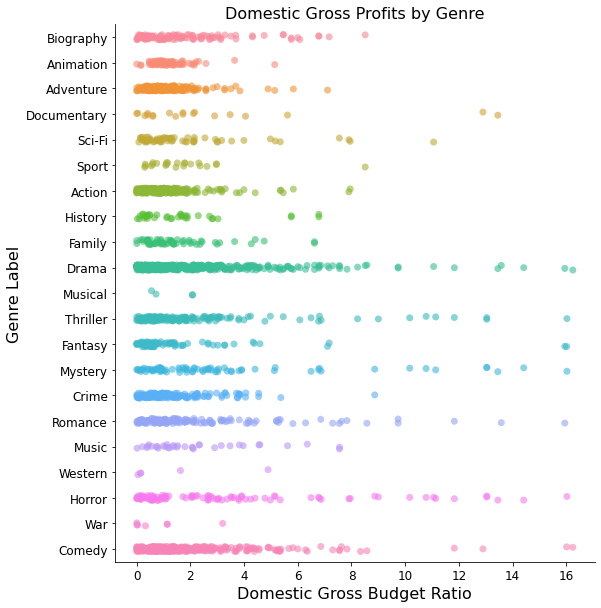

In [40]:
sns.catplot(x='domestic_gross_budget_ratio', y='genre_label', orient='h', s=7, alpha=0.6, height=8,data=genres_df)
plt.ylabel('Genre Label',fontsize=16)
plt.xlabel('Domestic Gross Budget Ratio',fontsize=16)
plt.tick_params(labelsize=12)
plt.title('Domestic Gross Profits by Genre',fontsize=16);

Most notable spreads by Domestic Gross Budget Ratio are between Comedy, Horror, Thriller, and Drama

### Worldwide Gross Profits by Genre

Text(0.5, 1.0, 'Worldwide Gross Profits by Genre')

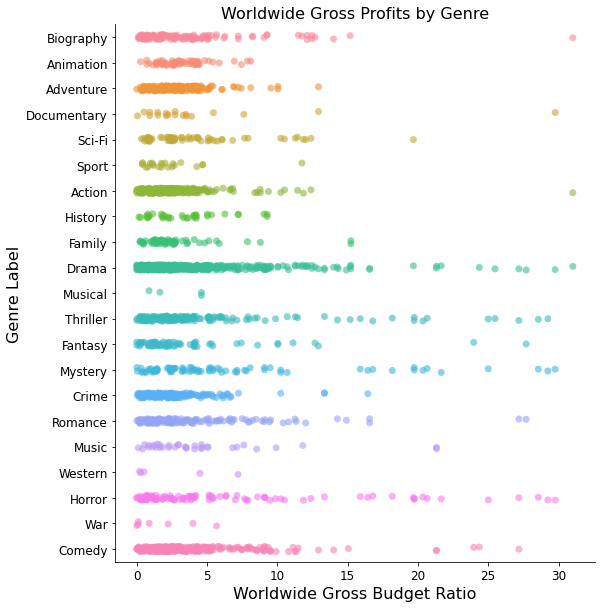

In [41]:
sns.catplot(x='worldwide_gross_budget_ratio', y='genre_label', orient='h', s=7, alpha=0.6, height=8,data=genres_df)
plt.ylabel('Genre Label',fontsize=16)
plt.xlabel('Worldwide Gross Budget Ratio',fontsize=16)
plt.tick_params(labelsize=12)
plt.title('Worldwide Gross Profits by Genre',fontsize=16)

Most notable spreads by Worldwide Gross Budget Ratio are between Comedy, Drama, Thriller, and Biography

In the next few visualizations, let us observe aggregations by genre: sum, mean, and median

### Domestic Gross Sum by Genre

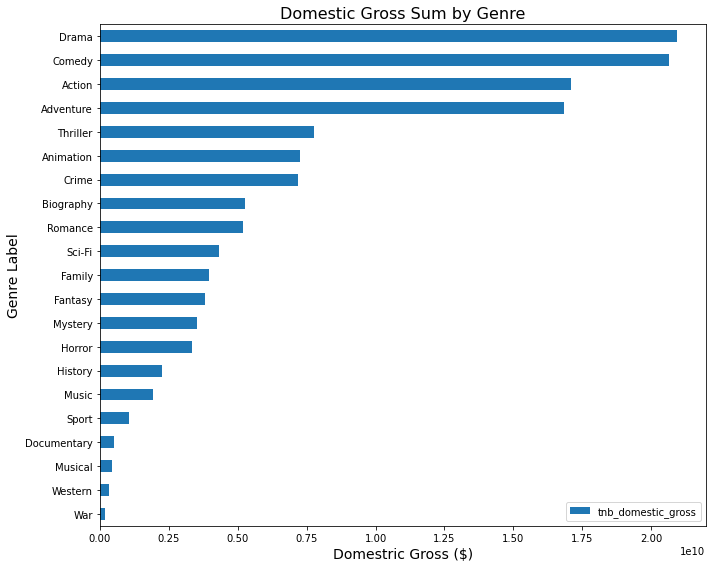

In [44]:
# Set size of plot
rcParams['figure.figsize'] = 10,8

# Group genre label and aggregate the SUM domestic gross
pd.DataFrame(genres_df.groupby('genre_label')['tnb_domestic_gross'].agg('sum')).sort_values('tnb_domestic_gross').plot(kind='barh');

# Set axis labels
plt.xlabel('Domestric Gross ($)',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('Domestic Gross Sum by Genre',fontsize=16)

# Format and save figure
plt.tight_layout()
plt.savefig('domestic_gross_sum.jpg',dpi=300)

### Worldwide Gross Sum by Genre

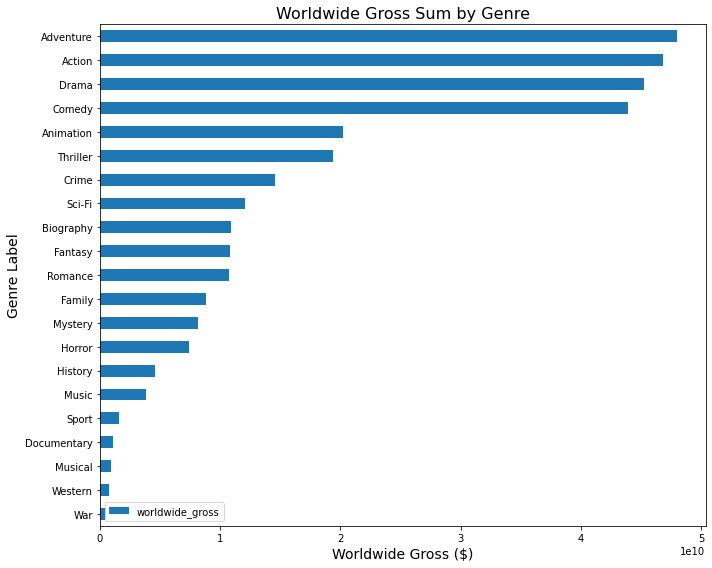

In [46]:
# Group genre label and aggregate the SUM worldwide gross
pd.DataFrame(genres_df.groupby('genre_label')['worldwide_gross'].agg('sum')).sort_values('worldwide_gross').plot(kind='barh')

# Set axis labels
plt.xlabel('Worldwide Gross ($)',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('Worldwide Gross Sum by Genre',fontsize=16)

# Format plot ans savefig
plt.tight_layout()
plt.savefig('worldwide_gross_sum.jpg',dpi=300)

From the two bar charts above, when it comes to top genres, the top 4 consist of Adventure, Action, Comedy and Drama with slight variation between their positioning.

### Domestic Gross Mean by Genre

In [48]:
# Group by genre_label and get aggregate mean of domestic_gross_budget_ratio
domestic_mean_profit_df = pd.DataFrame(genres_df.groupby('genre_label')['domestic_gross_budget_ratio'].agg('mean'))
domestic_mean_profit_df = domestic_mean_profit_df.sort_values('domestic_gross_budget_ratio').reset_index()

# Peek data
domestic_mean_profit_df.head()

,genre_label,domestic_gross_budget_ratio
0,War,0.834008
1,Action,1.083982
2,Adventure,1.143539
3,Animation,1.230574
4,Crime,1.343632


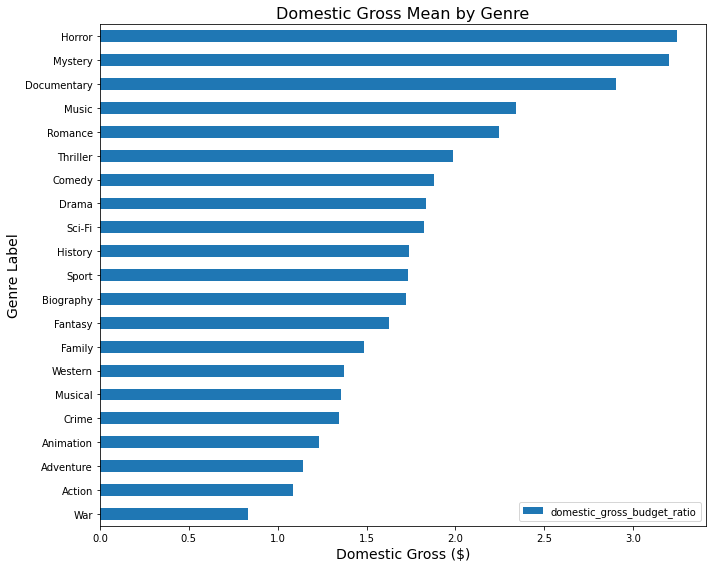

In [49]:
# Set genre_label as index and plot horizontal bar chart
domestic_mean_profit_df.set_index('genre_label').plot.barh()

# Create axis labels
plt.xlabel('Domestic Gross ($)',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('Domestic Gross Mean by Genre',fontsize=16)

# Format and save fig
plt.tight_layout()
plt.savefig('domestic_gross_mean.jpg',dpi=300)

### Domestic Gross Median by Genre

In [50]:
# Group by genre_label and get aggregate median of domestic_gross_budget_ratio
domestic_median_profit_df = pd.DataFrame(genres_df.groupby('genre_label')['domestic_gross_budget_ratio'].agg('median'))
domestic_median_profit_df = domestic_median_profit_df.sort_values('domestic_gross_budget_ratio').reset_index()

# Peek data
domestic_median_profit_df.head()

,genre_label,domestic_gross_budget_ratio
0,Western,0.151874
1,War,0.324298
2,Fantasy,0.688886
3,Action,0.858557
4,Adventure,0.930525


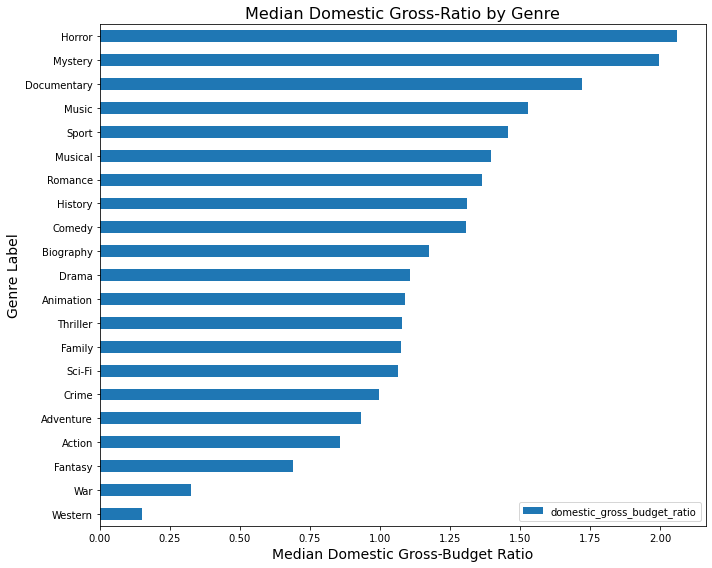

In [51]:
# Set genre_label as index and plot horizontal bar chart
domestic_median_profit_df.set_index('genre_label').plot.barh()

# Set axis labels
plt.xlabel('Median Domestic Gross-Budget Ratio',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('Median Domestic Gross-Ratio by Genre',fontsize=16)

# Format and save fig
plt.tight_layout()
plt.savefig('median_domestic_gross_ratio_bar.jpg',dpi=300)

### Worldwide Gross Mean by Genre

In [175]:
worldwide_mean_profit_df = pd.DataFrame(genres_df.groupby('genre_label')['worldwide_gross_budget_ratio'].agg('mean'))
worldwide_mean_profit_df = worldwide_mean_profit_df.sort_values('worldwide_gross_budget_ratio',ascending=False).reset_index()
worldwide_mean_profit_df.head()

,genre_label,worldwide_gross_budget_ratio
0,Mystery,6.791905
1,Horror,6.431273
2,Music,4.670360
3,Documentary,4.595779
4,Thriller,4.474388


### Worldwide Gross Median by Genre

In [52]:
# Group by genre_label and get aggregate median of worldwide_gross_budget_ratio
worldwide_median_profit_df = pd.DataFrame(genres_df.groupby('genre_label')['worldwide_gross_budget_ratio'].agg('median'))
worldwide_median_profit_df = worldwide_median_profit_df.sort_values('worldwide_gross_budget_ratio').reset_index()
worldwide_median_profit_df.head()

,genre_label,worldwide_gross_budget_ratio
0,Western,0.513598
1,War,0.888465
2,Sport,1.745181
3,Family,2.009261
4,Fantasy,2.036009


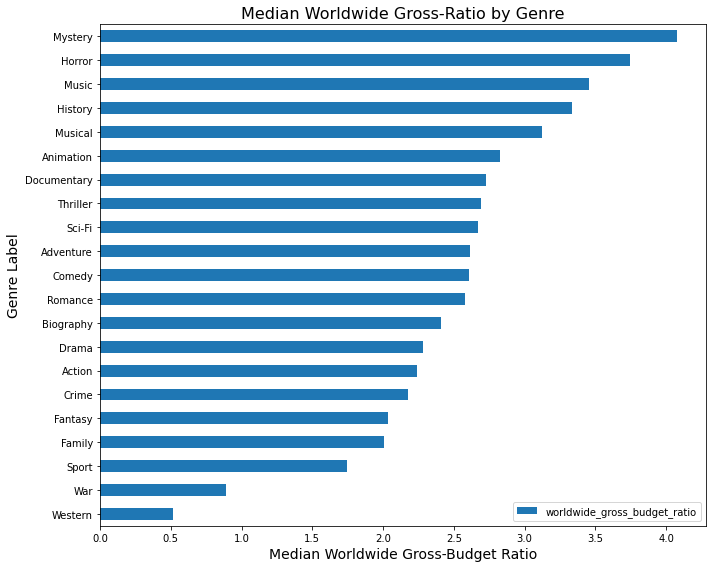

In [53]:
# Set genre_label as index and plot horizontal bar chart
worldwide_median_profit_df.set_index('genre_label').plot.barh()

# Set axis labels
plt.xlabel('Median Worldwide Gross-Budget Ratio',fontsize=14)
plt.ylabel('Genre Label',fontsize=14)
plt.title('Median Worldwide Gross-Ratio by Genre',fontsize=16)

# Format and savefig
plt.tight_layout()
plt.savefig('median_worldwide_gross_ratio_bar.jpg',dpi=300)

### Split movies into 3 categories production budget: Low, Medium, High

We have an idea OVERALL of what are the most profitable type genres of films. Lets look into how these genres are segmented when we split the production into 3 tiers
- Low
- Medium
- High

In [54]:
# Use pandas.cut to divide up the production budget
pd.cut(movie_gross_df_o.production_budget, 3, retbins=True)

(1057    (-119950.0, 56700000.0]
 1068    (-119950.0, 56700000.0]
 1034    (-119950.0, 56700000.0]
 604     (-119950.0, 56700000.0]
 667     (-119950.0, 56700000.0]
                  ...           
 653     (-119950.0, 56700000.0]
 536     (-119950.0, 56700000.0]
 361     (-119950.0, 56700000.0]
 299     (-119950.0, 56700000.0]
 725     (-119950.0, 56700000.0]
 Name: production_budget, Length: 1017, dtype: category
 Categories (3, interval[float64]): [(-119950.0, 56700000.0] < (56700000.0, 113350000.0] < (113350000.0, 170000000.0]],
 array([-1.1995e+05,  5.6700e+07,  1.1335e+08,  1.7000e+08]))

In [55]:
# create column called budget_label to categorize budgets into low, medium, or high
movie_gross_df_o['budget_label'] = pd.cut(movie_gross_df_o.production_budget, 3, labels=['Low', 'Medium', 'High'])

# Peek data
movie_gross_df_o.head()

<ipython-input-55-4b0c553df536>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_gross_df_o['budget_label'] = pd.cut(movie_gross_df_o.production_budget, 3, labels=['Low', 'Medium', 'High'])


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,budget_label
1057,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,2016,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Low
1068,92110,tt5328340,Lights Out,Lights Out,2016,90,Documentary,2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302,Low
1034,82941,tt4786282,Lights Out,Lights Out,2016,81,"Drama,Horror,Mystery",2380,Lights Out,WB (NL),...,2016,5000000,67268835,148806510,Lights Out,2016,12.408,13.453767,29.761302,Low
604,22460,tt1922777,Sinister,Sinister,2012,110,"Horror,Mystery,Thriller",808,Sinister,LG/S,...,2012,3000000,48086903,87727807,Sinister,2012,13.117,16.028968,29.242602,Low
667,28752,tt2109184,Paranormal Activity 4,Paranormal Activity 4,2012,88,"Horror,Mystery,Thriller",777,Paranormal Activity 4,Par.,...,2012,5000000,53900335,142817992,Paranormal Activity 4,2012,8.965,10.780067,28.563598,Low


## Genre Analysis -- Domestic & Worldwide Gross Ratio as a Success Metric

### Observe same metrics for profits and top grossing and observe how they differ between budget categories

#### Low budget --> genre analysis

In [61]:
# Peek data to join
genres_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,year,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label
1057,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,2016,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Biography
659,27716,tt2084970,The Imitation Game,The Imitation Game,2014,114,"Biography,Drama,Thriller",1511,The Imitation Game,Wein.,...,2014,15000000,91125143,227740463,The Imitation Game,2014,33.078,6.075010,15.182698,Biography
1120,117014,tt6966692,Green Book,Green Book,2018,130,"Biography,Comedy,Drama",3109,Green Book,Uni.,...,2018,23000000,85080171,322034439,Green Book,2018,36.284,3.699138,14.001497,Biography
128,5500,tt1072748,Winchester,Winchester,2018,99,"Biography,Drama,Fantasy",3196,Winchester,LGF,...,2018,3500000,25091816,44378040,Winchester,2018,12.440,7.169090,12.679440,Biography
942,65537,tt3741834,Lion,Lion,2016,118,"Biography,Drama",2383,Lion,Wein.,...,2016,12000000,51739495,149570720,Lion,2016,17.216,4.311625,12.464227,Biography


In [62]:
# Join movie_gross_df_o (with remove outliers) and genres_df_o without outliers to append budget_label columns
movie_budget_genres_df = pd.merge( genres_df, movie_gross_df_o[['tconst','budget_label']], on='tconst', how='inner' )
print(movie_budget_genres_df.shape)
movie_budget_genres_df.head()

(3055, 25)


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label
0,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Biography,Low
1,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Action,Low
2,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Drama,Low
3,27716,tt2084970,The Imitation Game,The Imitation Game,2014,114,"Biography,Drama,Thriller",1511,The Imitation Game,Wein.,...,15000000,91125143,227740463,The Imitation Game,2014,33.078,6.075010,15.182698,Biography,Low
4,27716,tt2084970,The Imitation Game,The Imitation Game,2014,114,"Biography,Drama,Thriller",1511,The Imitation Game,Wein.,...,15000000,91125143,227740463,The Imitation Game,2014,33.078,6.075010,15.182698,Drama,Low


In [63]:
# Create dataframe filtering for movies with a 'Low' budget_label
low_budget_df = movie_budget_genres_df[movie_budget_genres_df['budget_label']=='Low']

# Peek data
print( low_budget_df.shape )
low_budget_df.head()

(2288, 25)


,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label
0,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Biography,Low
1,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Action,Low
2,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Drama,Low
3,27716,tt2084970,The Imitation Game,The Imitation Game,2014,114,"Biography,Drama,Thriller",1511,The Imitation Game,Wein.,...,15000000,91125143,227740463,The Imitation Game,2014,33.078,6.075010,15.182698,Biography,Low
4,27716,tt2084970,The Imitation Game,The Imitation Game,2014,114,"Biography,Drama,Thriller",1511,The Imitation Game,Wein.,...,15000000,91125143,227740463,The Imitation Game,2014,33.078,6.075010,15.182698,Drama,Low


#### Examine relationship between Production Budget and Worldwide Gross ($)

For the remainder of this analysis, I will mainly observe worldwide gross ($) only. I am making the assumption domestic_gross will reveal similar trends / insights.

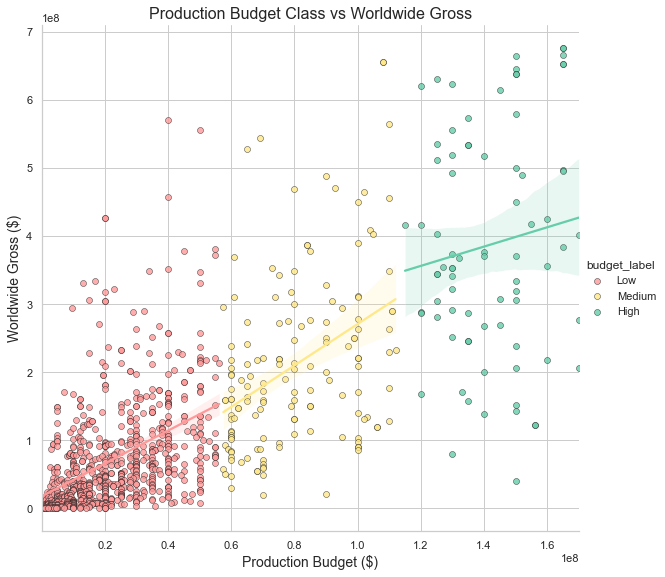

In [64]:
# Plot scatter chart to observe relationship between production budget and worldwide gross                 
lp = sns.lmplot(x='production_budget', y='worldwide_gross', hue='budget_label', 
                palette={"Low": "#FF9999", "Medium": "#FFE888", "High": '#66CDAA'},
                data=movie_gross_df_o, fit_reg=True, legend=True,height=8,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

# Set axis labels
plt.xlabel('Production Budget ($)',fontsize=14)
plt.ylabel('Worldwide Gross ($)',fontsize=14)
plt.title('Production Budget Class vs Worldwide Gross',fontsize=16)

# Format and savefig
plt.savefig('ProductionBudgetClassvsWorldwide Gross.jpg',dpi=300)

There appears to be a positive correlation between production budget and worldwide_gross.

#### Examine relationship between Production Budget and Worldwide Gross-Budget Ratio

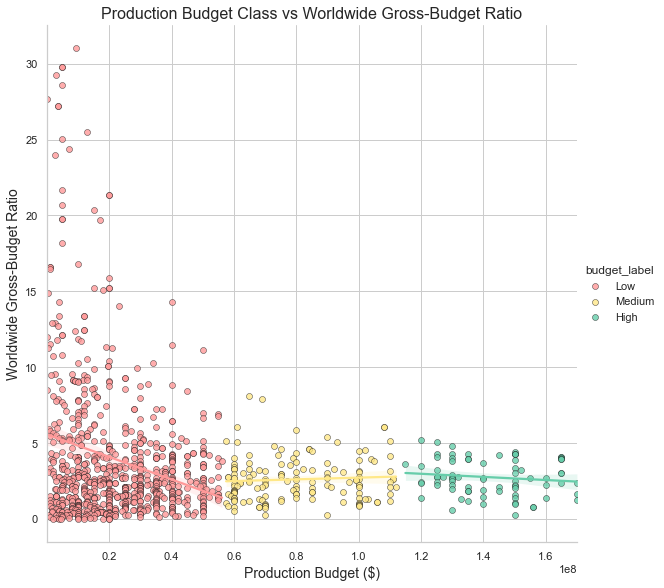

In [65]:
# Plot scatter chart to observe relationship between production budget and worldwide_gross_budget_ratio.
# Differentiate budget_label by color hue
lp = sns.lmplot(x='production_budget', y='worldwide_gross_budget_ratio', hue='budget_label', 
                palette={"Low": "#FF9999", "Medium": "#FFE888", "High": '#66CDAA'},
                data=movie_gross_df_o, fit_reg=True, legend=True, height=8,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))    

# Set axis labels
plt.xlabel('Production Budget ($)',fontsize=14)
plt.ylabel('Worldwide Gross-Budget Ratio',fontsize=14)
plt.title('Production Budget Class vs Worldwide Gross-Budget Ratio',fontsize=16)

# Savefig
plt.savefig('ProductionBudgetClassvsWorldwideGrossRatio.jpg',dpi=300,bbox_inches = 'tight')

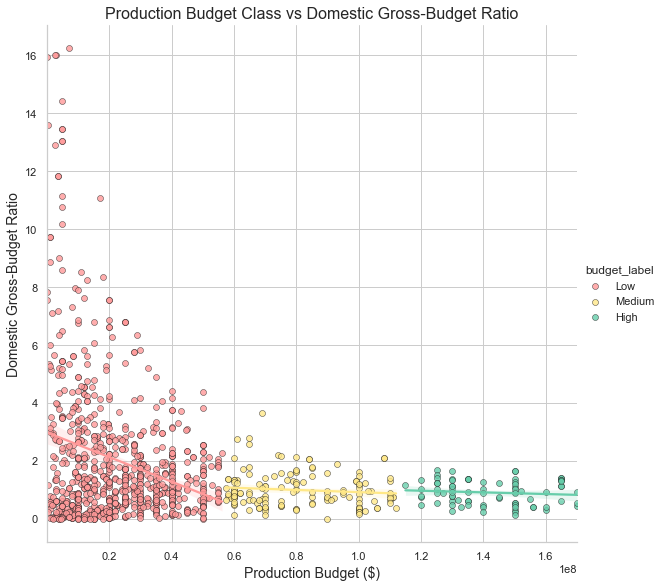

In [66]:
# we can also view relationships\correlations as needed                  
lp = sns.lmplot(x='production_budget', y='domestic_gross_budget_ratio', hue='budget_label', 
                palette={"Low": "#FF9999", "Medium": "#FFE888", "High": '#66CDAA'},
                data=movie_gross_df_o, fit_reg=True, legend=True, height=8,
                scatter_kws=dict(edgecolor="k", linewidth=0.5))

plt.xlabel('Production Budget ($)',fontsize=14)
plt.ylabel('Domestic Gross-Budget Ratio',fontsize=14)
plt.title('Production Budget Class vs Domestic Gross-Budget Ratio',fontsize=16)
# plt.tight_layout()
plt.savefig('ProductionBudgetClassvsDomesticGrossRatio.jpg',dpi=300,bbox_inches = 'tight')

In spite of a seemingly positive correlation between production_budget and worldwide_gross & tnb_domestic_gross. There doesn't appear to be a correlation between production budget and the profits made.

Given the L-shape of the scatter plot. Many appear to break even or make little profit

Let's get a closer look into how the genres break up between the different budget_labels

#### Low Budget Worldwide Gross and Worldwide Gross-Budget Ratio Deep Dive

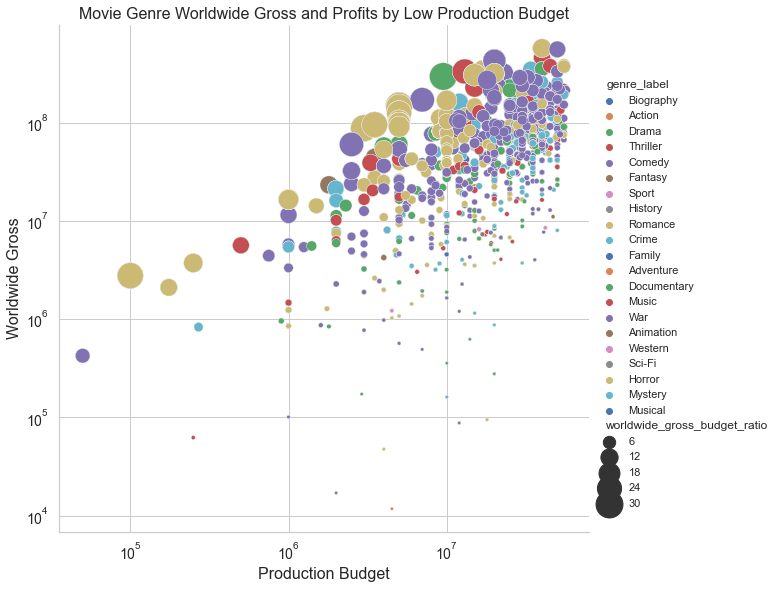

In [71]:
sns.set_theme(style="whitegrid")

# Plot scatter plot adding a 3rd dimension, changing the size of the point relative to its worldwide gross-budget ratio
g = sns.relplot(
    data=low_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 750),height=8, palette = 'deep'
)

# Set axis labels
g.set(xscale="log", yscale="log")
plt.tick_params(labelsize=14)
plt.ylabel('Worldwide Gross',fontsize=16)
plt.xlabel('Production Budget',fontsize=16)
plt.title('Movie Genre Worldwide Gross and Profits by Low Production Budget',fontsize=16)

# Save fig
plt.savefig('MovieGenreWorldwideProfits_LowBudget.jpg',dpi=300,bbox_inches = 'tight')

Plot a bar chart below to validate confirm scatter chart below. Identify top 5 profitable low budget movies.

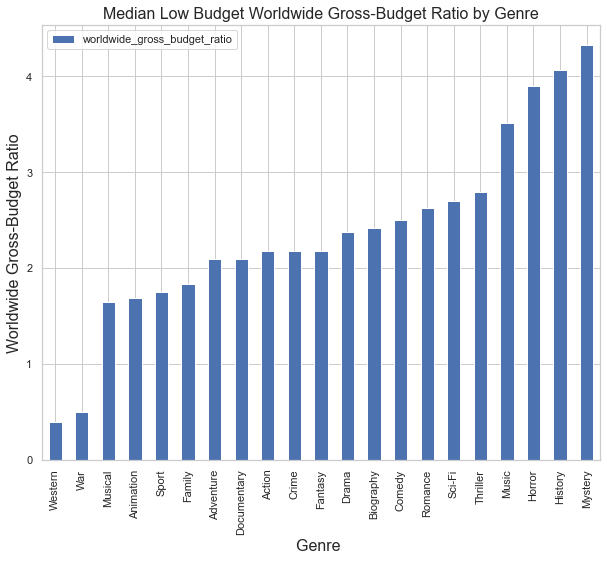

In [332]:
# Group low_budget_df by genre_label and get aggregate median by genre
pd.DataFrame(low_budget_df.groupby('genre_label')['worldwide_gross_budget_ratio'].median()).sort_values('worldwide_gross_budget_ratio').plot.bar()

# Set axis labels
plt.ylabel('Worldwide Gross-Budget Ratio',fontsize=16)
plt.xlabel('Genre ',fontsize=16)
plt.title('Median Low Budget Worldwide Gross-Budget Ratio by Genre',fontsize=16)

# Save fig
plt.savefig('MedianLowBudgetWorldwideGross-BudgetRatiobyGenre.jpg',dpi=300,bbox_inches = 'tight')

From the above bar chart, we can observe that Mystery, History, Horror, Music, and Thriller are the top 5 profitable genres within the low budget movie category

#### Medium Budget Worldwide Gross and Worldwide Gross-Budget Ratio Deep Dive

In [72]:
# Create dataframe storing all movies with a 'Medium' budget_label
med_budget_df = movie_budget_genres_df[movie_budget_genres_df['budget_label']=='Medium']

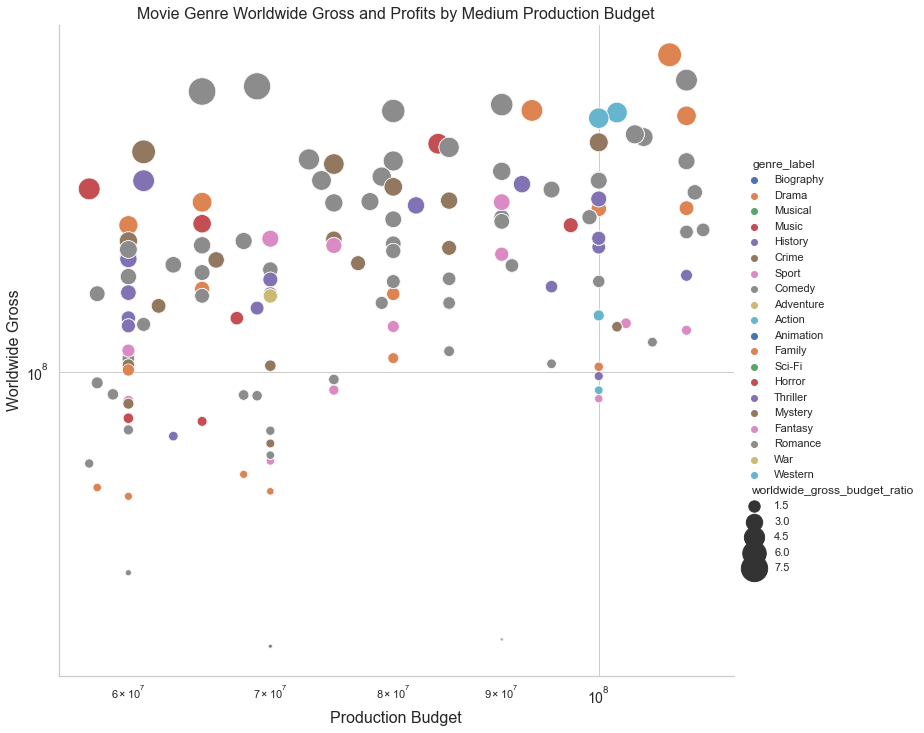

In [73]:
# Plot scatter plot adding a 3rd dimension, changing the size of the point relative to its worldwide gross-budget ratio
g = sns.relplot(
    data=med_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 750),height=10, palette = 'deep'
)

# Set axis labels and scale
g.set(xscale="log", yscale="log")
plt.tick_params(labelsize=14)
plt.ylabel('Worldwide Gross',fontsize=16)
plt.xlabel('Production Budget',fontsize=16)
plt.title('Movie Genre Worldwide Gross and Profits by Medium Production Budget',fontsize=16)

# Format and save fig
plt.savefig('MovieGenreWorldwideProfits_MedBudget',dpi=300,bbox_inches = 'tight')

Plot a bar chart below to validate confirm scatter chart below. Identify top 5 profitable medium budget movies.

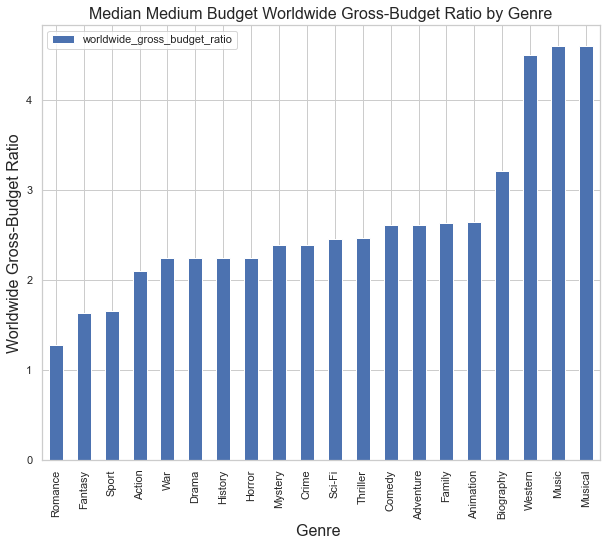

In [74]:
# Group med_budget_df by genre_label and get aggregate median by genre
pd.DataFrame(med_budget_df.groupby('genre_label')['worldwide_gross_budget_ratio'].median()).sort_values('worldwide_gross_budget_ratio').plot.bar()

# Set axis labels
plt.ylabel('Worldwide Gross-Budget Ratio',fontsize=16)
plt.xlabel('Genre ',fontsize=16)
plt.title('Median Medium Budget Worldwide Gross-Budget Ratio by Genre',fontsize=16)

# Format and save fig
plt.savefig('MedianMedBudgetWorldwideGross-BudgetRatiobyGenre.jpg',dpi=300,bbox_inches = 'tight')

We can observe from the above bar chart that Musical, Music, Western, Biography, and Animation are the top 5 profitable genres within the medium budget category.

#### High Budget Worldwide Gross and Worldwide Gross-Budget Ratio Deep Dive

In [76]:
# Create dataframe storing all movies with a 'High' budget_label
high_budget_df = movie_budget_genres_df[movie_budget_genres_df['budget_label']=='High']

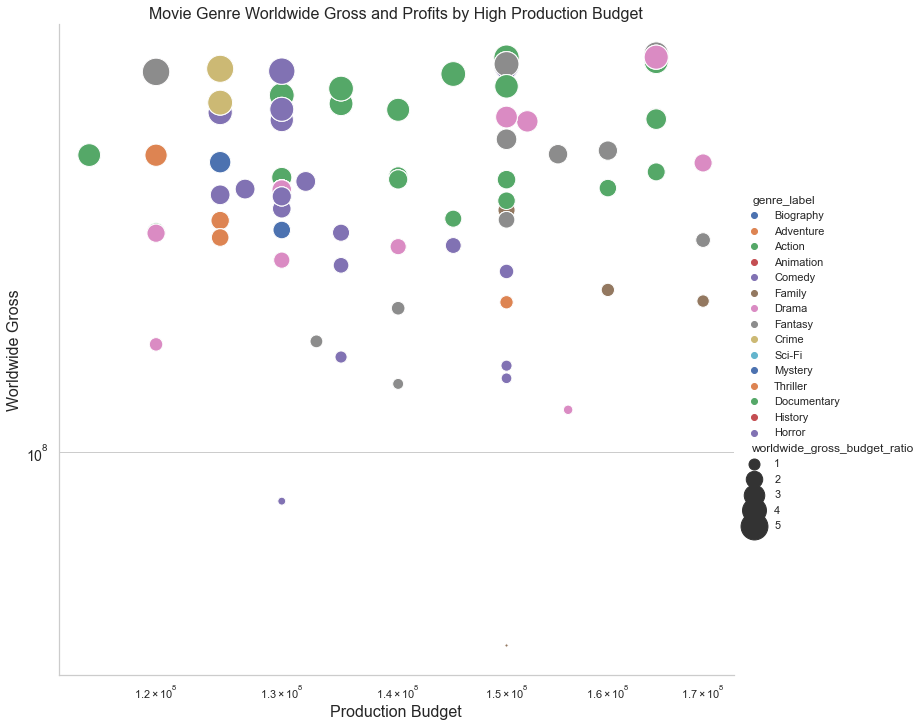

In [77]:
# Plot scatter plot adding a 3rd dimension, changing the size of the point relative to its worldwide gross-budget ratio
g = sns.relplot(
    data=high_budget_df,
    x="production_budget", y="worldwide_gross",
    hue="genre_label", size="worldwide_gross_budget_ratio", sizes=(10, 750),height=10, palette = 'deep'
)

# Set axis labels and scale
g.set(xscale="log", yscale="log")
plt.tick_params(labelsize=14)
plt.ylabel('Worldwide Gross',fontsize=16)
plt.xlabel('Production Budget',fontsize=16)
plt.title('Movie Genre Worldwide Gross and Profits by High Production Budget',fontsize=16)

# Format and save fig
plt.savefig('MovieGenreWorldwideProfits_HighBudget',dpi=300,bbox_inches = 'tight')

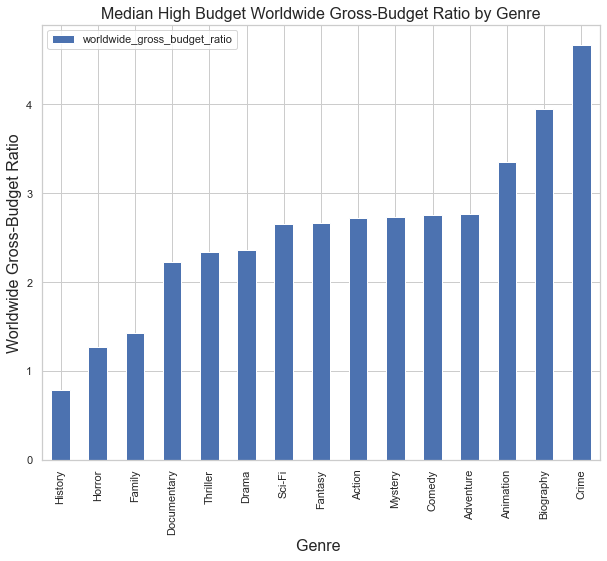

In [78]:
# Group high_budget_df by genre_label and get aggregate median by genre
pd.DataFrame(high_budget_df.groupby('genre_label')['worldwide_gross_budget_ratio'].median()).sort_values('worldwide_gross_budget_ratio').plot.bar()

# Set axis labels
plt.ylabel('Worldwide Gross-Budget Ratio',fontsize=16)
plt.xlabel('Genre ',fontsize=16)
plt.title('Median High Budget Worldwide Gross-Budget Ratio by Genre',fontsize=16)

# Format and save fig
plt.savefig('MedianHighBudgetWorldwideGross-BudgetRatiobyGenre.jpg',dpi=300,bbox_inches = 'tight')

We can observe from the above bar chart that Musical, Music, Western, Biography, and Animation are the top 5 profitable genres within the high budget category.

#### Genre by Genre comparison

In [80]:
# Select 5 common genres within the top 5 worldwide gross-budget ratio of each production budget category
selected_genres = ['Horror','Biography','Music','Animation','Adventure']

# Create dataframe selecting movies only in these selected genres to set up analysis for genre-to-genre comparison
selected_genres_df = movie_budget_genres_df[movie_budget_genres_df['genre_label'].isin(selected_genres)]

In [81]:
# Peek data
selected_genres_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,production_budget,tnb_domestic_gross,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label
0,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,9500000,12391761,294654618,Dangal,2016,10.022,1.304396,31.016276,Biography,Low
3,27716,tt2084970,The Imitation Game,The Imitation Game,2014,114,"Biography,Drama,Thriller",1511,The Imitation Game,Wein.,...,15000000,91125143,227740463,The Imitation Game,2014,33.078,6.075010,15.182698,Biography,Low
6,117014,tt6966692,Green Book,Green Book,2018,130,"Biography,Comedy,Drama",3109,Green Book,Uni.,...,23000000,85080171,322034439,Green Book,2018,36.284,3.699138,14.001497,Biography,Low
9,5500,tt1072748,Winchester,Winchester,2018,99,"Biography,Drama,Fantasy",3196,Winchester,LGF,...,3500000,25091816,44378040,Winchester,2018,12.440,7.169090,12.679440,Biography,Low
12,65537,tt3741834,Lion,Lion,2016,118,"Biography,Drama",2383,Lion,Wein.,...,12000000,51739495,149570720,Lion,2016,17.216,4.311625,12.464227,Biography,Low


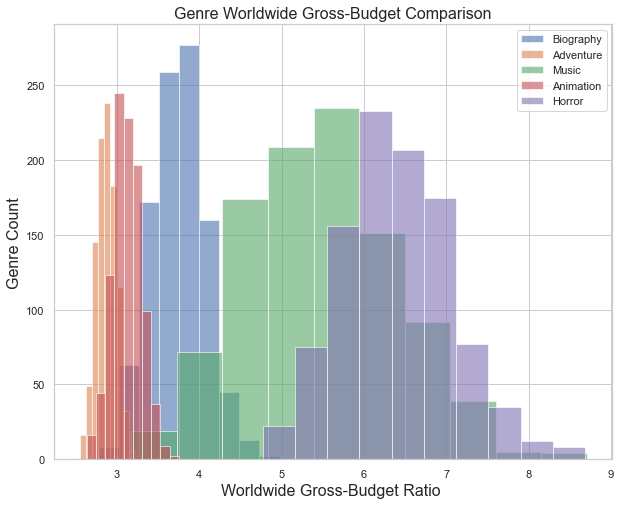

In [82]:
# Iterate through the genre_label
for genre in selected_genres_df.genre_label.unique():
    # Create temp dataframe for the genre being iterated on
    frame = selected_genres_df[selected_genres_df.genre_label==genre]
    
    # Create list of sample_means of size 1000 to plot distributions of worldwide_gross_budget_ratio.
    # Set up comparison genre-to-genre
    sample_means = [np.random.choice(frame.worldwide_gross_budget_ratio, replace=True, size=len(frame)).mean() for x in range(1000)]
    plt.hist(sample_means, label=genre,alpha=0.6)

# Set axis labels
plt.legend()
plt.ylabel('Genre Count',fontsize=16)
plt.xlabel('Worldwide Gross-Budget Ratio ',fontsize=16)
plt.title('Genre Worldwide Gross-Budget Comparison',fontsize=16)

# Format and save fig
plt.savefig('GenreWorldwideGross-BudgetComparison.jpg',dpi=300)

## Investigate the ratings of films with the selected genres.
Use ratings as an alternative metric to explore in addition to gross-budget ratio

Set up tables to join with genres tables
- imdb_title_ratings
- imdb_title_principals

- genres_df_o
- low_budget_df
- med_budget_df
- high_budget_df

In [83]:
# Create dataframe to examine the ratings of the movies as an alternative variable to gross-budget ratio
title_ratings_df = pandas_df_sql("select tconst, averagerating, numvotes from imdb_title_ratings")
title_ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [84]:
# Merge ratings dataframe with selected_genres_df on tconst key
ratings_profits_df = pd.merge( selected_genres_df, title_ratings_df, on='tconst',how='inner' )

# Peek data
ratings_profits_df.head()

,idx,tconst,primary_title,original_title,start_year,runtime_minutes,genres,idx,title,studio,...,worldwide_gross,title,year,popularity,domestic_gross_budget_ratio,worldwide_gross_budget_ratio,genre_label,budget_label,averagerating,numvotes
0,87402,tt5074352,Dangal,Dangal,2016,161,"Action,Biography,Drama",2351,Dangal,UTV,...,294654618,Dangal,2016,10.022,1.304396,31.016276,Biography,Low,8.5,123638
1,27716,tt2084970,The Imitation Game,The Imitation Game,2014,114,"Biography,Drama,Thriller",1511,The Imitation Game,Wein.,...,227740463,The Imitation Game,2014,33.078,6.075010,15.182698,Biography,Low,8.0,620834
2,117014,tt6966692,Green Book,Green Book,2018,130,"Biography,Comedy,Drama",3109,Green Book,Uni.,...,322034439,Green Book,2018,36.284,3.699138,14.001497,Biography,Low,8.3,204972
3,5500,tt1072748,Winchester,Winchester,2018,99,"Biography,Drama,Fantasy",3196,Winchester,LGF,...,44378040,Winchester,2018,12.440,7.169090,12.679440,Biography,Low,5.4,24351
4,65537,tt3741834,Lion,Lion,2016,118,"Biography,Drama",2383,Lion,Wein.,...,149570720,Lion,2016,17.216,4.311625,12.464227,Biography,Low,8.1,181601


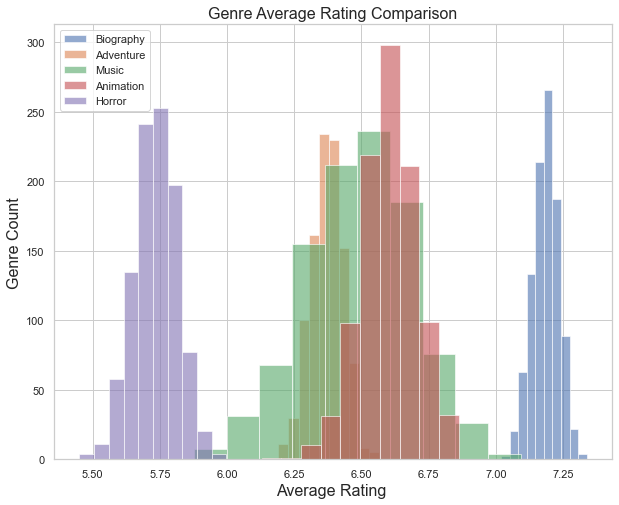

In [85]:
# Iterate through genre label
for genre in ratings_profits_df.genre_label.unique():
    # Create temp dataframe for the genre being iterated on
    frame = ratings_profits_df[ratings_profits_df.genre_label==genre]
    
    # Create list of sample_means of size 1000 to plot distributions of averagerating.
    # Set up comparison genre-to-genre
    sample_means = [np.random.choice(frame.averagerating, replace=True, size=len(frame)).mean() for x in range(1000)]
    plt.hist(sample_means, label=genre,alpha=0.6)

# Set axis labels
plt.legend()
plt.ylabel('Genre Count',fontsize=16)
plt.xlabel('Average Rating ',fontsize=16)
plt.title('Genre Average Rating Comparison',fontsize=16)

# Format and save fig
plt.savefig('GenreAvgRatingComparison.jpg',dpi=300)

## Investigate the popularity of films with the selected genres
Use populatiry as an alternative metric to explore in addition to gross-budget ratio, and average rating

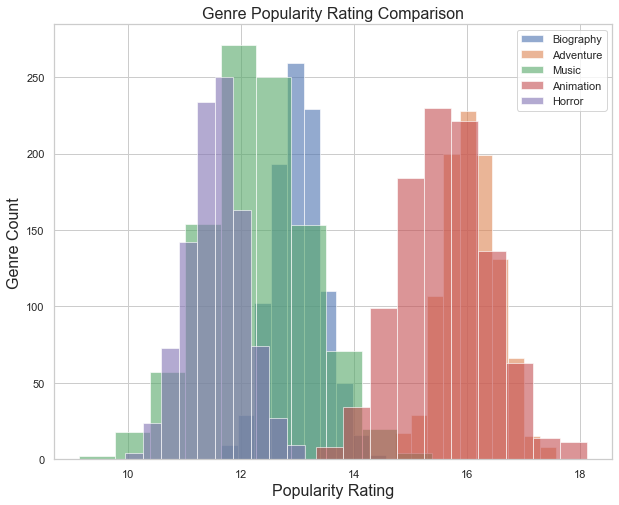

In [88]:
# Iterate through selected genre labels
for genre in ratings_profits_df.genre_label.unique():
    # Create temp dataframe for the genre being iterated on
    frame = ratings_profits_df[ratings_profits_df.genre_label==genre]
    
    # Create list of sample_means of size 1000 to plot distributions of popularity
    # Set up comparison genre-to-genre
    sample_means = [np.random.choice(frame.popularity, replace=True, size=len(frame)).mean() for x in range(1000)]
    plt.hist(sample_means, label=genre,alpha=0.6)

# Set axis labels
plt.legend()
plt.ylabel('Genre Count',fontsize=16)
plt.xlabel('Popularity Rating',fontsize=16)
plt.title('Genre Popularity Rating Comparison',fontsize=16)

# Format and savefig
plt.savefig('GenrePopularityRatingComparison.jpg',dpi=300)

## Director & Author Recommendation
- These directors are queried based on if they directed movies for a horror or mystery film
- Director and author on average has a tomatometer rating of 70 or higher

The query below looks at movie directors and the number of movies they have worked on in the selected genres where they obtained an average rotten tomato rating of 70 or higher.

In [90]:
director_query = """
select directors, count(*) as movie_count, avg(tomatometer_rating) as avg_tomatometer_rating FROM rotten_tomatoes_movies
where genres like '%Horror%' or genres like '%Animation%' or genres like '%Adventure%' or genres like '%Biography%'
group by directors 
having avg_tomatometer_rating >= 70
order by movie_count desc
"""

In [91]:
# Create director dataframe
director_df = pandas_df_sql(director_query)
director_df.head(10)

,directors,movie_count,avg_tomatometer_rating
0,Steven Spielberg,16,79.625000
1,Brian DePalma,13,70.153846
2,Roger Corman,12,70.916667
3,David Cronenberg,12,78.833333
4,Robert Zemeckis,11,74.000000
5,Peter Jackson,11,73.818182
6,Hayao Miyazaki,11,92.600000
7,Takashi Miike,10,71.000000
8,Sam Raimi,10,80.000000
9,John Sturges,10,72.300000


The query below is similar to the directors query but instead looks at authors. The same genre filter and average tomato ratings filter is applied here.

In [92]:
author_query = """
select authors, count(*) as movie_count, avg(tomatometer_rating) as avg_tomatometer_rating FROM rotten_tomatoes_movies
where genres like '%Horror%' or genres like '%Animation%' or genres like '%Adventure%' or genres like '%Biography%'
group by authors 
having avg_tomatometer_rating >= 70
order by movie_count desc
"""

In [93]:
author_df = pandas_df_sql(author_query)
author_df.head(10)

,authors,movie_count,avg_tomatometer_rating
0,Werner Herzog,6,90.166667
1,Quentin Tarantino,6,84.500000
2,Takeshi Kitano,5,73.200000
3,Steve Kloves,5,85.200000
4,Romeo Muller,5,78.600000
5,Richard Matheson,5,72.000000
6,Hayao Miyazaki,5,91.000000
7,David Koepp,5,70.000000
8,"Christopher Markus, Stephen McFeely",5,80.000000
9,Charles M. Schulz,5,95.500000


## Conclusions

What I would recommend is for first the Microsoft stakeholders to question what is their expected production budget? Based on the trends, should they invest between $600,000 and $1,800,000, they can perhaps break even or 1.5 - 2 times that investment. However, should they invest less than $600,000, it is possible to double or quadruple that amount. The less money, the likelier they can multiply that investment.

Once broken down into budgets, Microsoft can then decide which genre of movie to initially explore. Based on the three paramaters of gross_budget ratio, average ratings, and popularity -- Horror and Mystery are the genres that stand out the most.

Lastly, based on the suggested genres of Horror and Mystery -- digging into the Rotten Tomatoes table, some directors that may be worth reaching out to (also depending on the budget, and alive status) include David Croenberg, Martin Scorsese, Steven Spielberg, Steven Soderbergh, and Sam Raimi

## Next Steps

Nonetheless, based on the presented analysis, these results may not fully solve the business problem as it leaves to be desired the amount of marketing involved, region specific analyses should a smaller specific release be considered. With the movie going on hold during the pandemic, what does an the avenue of online streaming look like? Lastly, the directors and production teams that best fit the Horror and Mystery genre recommendations.

In the future, I would like to further add the data in rotten tomatoes as another dimension -- ratings from audience, critics, and perhaps create a sentiment analysis using the text data. Another direction is to understand the avenue of online streaming, and profits to be made there vs in-person movie going.